## Visualize Chatbot/Response Data to Inform Business Decisions
#### Emily Flores

Work on Customer Support Twitter dataset, modern corpus of tweets and replies. Check, analyze and understand the pattern and conversations, and for study of modern customer support practices and impact. Using the data, analyze and build interactive visualization to make business decision. 


####  Exploratory data analysis 

In [1]:
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from collections import Counter 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from spellchecker import SpellChecker 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from textblob import TextBlob
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px

In [2]:
file_path = 'twcs.csv'
dataset = pd.read_csv('twcs.csv')

In [3]:
dataset.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [4]:
rows, columns = dataset.shape

In [5]:
print("Number of Rows:", rows)

Number of Rows: 2811774


In [6]:
print("Number of Columns:", columns)

Number of Columns: 7


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tweet_id                 int64  
 1   author_id                object 
 2   inbound                  bool   
 3   created_at               object 
 4   text                     object 
 5   response_tweet_id        object 
 6   in_response_to_tweet_id  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB


In [8]:
description = dataset.describe()

In [9]:
print(description)

           tweet_id  in_response_to_tweet_id
count  2.811774e+06             2.017439e+06
mean   1.504565e+06             1.463141e+06
std    8.616450e+05             8.665730e+05
min    1.000000e+00             1.000000e+00
25%    7.601652e+05             7.155105e+05
50%    1.507772e+06             1.439805e+06
75%    2.253296e+06             2.220646e+06
max    2.987950e+06             2.987950e+06


In [10]:
dataset.isnull().sum()

tweet_id                         0
author_id                        0
inbound                          0
created_at                       0
text                             0
response_tweet_id          1040629
in_response_to_tweet_id     794335
dtype: int64

In [11]:
duplicateValues = dataset.duplicated()

In [12]:
print(duplicateValues.sum())

0


In [13]:
dataset[duplicateValues]

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id


#### The data can be cleaned by reordering the 'created_at' attribute by date added.
#### Most recent tweet at the top of data set * oldest at the end.

In [14]:
dataset.sort_values(by='created_at', ascending=True, inplace=True)

In [15]:
dataset.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
2496505,2666295,751178,True,Fri Apr 01 17:37:48 +0000 2016,@AskSeagate Same issue Seagate. Is there a sol...,2666294,2666296.0
2496504,2666294,AskSeagate,False,Fri Apr 01 18:22:40 +0000 2016,@751178 Pls give us more clarification on your...,2666293,2666295.0
2496503,2666293,751178,True,Fri Apr 01 18:25:52 +0000 2016,@AskSeagate Bootstrap and media server daemon ...,2666291,2666294.0
2496501,2666291,AskSeagate,False,Fri Apr 01 19:53:33 +0000 2016,@751178 Pls use the link bellow to download th...,2666292,2666293.0
352823,402549,211231,True,Fri Apr 03 19:57:41 +0000 2015,@AsurionCares How do I get a receipt of my mon...,402547,NaN


#### The data can be cleaned by reorganizing the author_id by alphabetic order.
#### Start with 'author_id' that starts with 'a' & ends with 'z'

In [16]:
dataset.sort_values(by='author_id', ascending=True, inplace=True)

In [17]:
dataset.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
576082,648216,10026,True,Thu Oct 05 00:08:01 +0000 2017,Screw you @116016 and your stupid Blueprint pr...,648215,NaN
1543061,1693185,10026,True,Mon Nov 06 15:38:24 +0000 2017,"Dear @ChaseSupport, it’s kinda hard to pay my ...",1693184,NaN
1543060,1693184,10026,True,Mon Nov 06 15:45:29 +0000 2017,@ChaseSupport Actually it just doesn’t work in...,1693183,1693185.0
637146,713796,100363,True,Tue Oct 10 22:25:39 +0000 2017,Now the flight @Delta is sending our bag back ...,713795,NaN
1752883,1906927,10103,True,Wed Oct 25 09:42:58 +0000 2017,@MOO Big thanks to Quentin for the exceptional...,1906926,NaN


#### I noticed there are repeated 'author_id' we can group them together. 
#### While maintaing the 'author_id' in alphabetic order.
#### This will make it easier to access tweets from specific users. 

In [18]:
grouped_data = dataset.groupby('author_id')

In [19]:
dataset.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
576082,648216,10026,True,Thu Oct 05 00:08:01 +0000 2017,Screw you @116016 and your stupid Blueprint pr...,648215,NaN
1543061,1693185,10026,True,Mon Nov 06 15:38:24 +0000 2017,"Dear @ChaseSupport, it’s kinda hard to pay my ...",1693184,NaN
1543060,1693184,10026,True,Mon Nov 06 15:45:29 +0000 2017,@ChaseSupport Actually it just doesn’t work in...,1693183,1693185.0
637146,713796,100363,True,Tue Oct 10 22:25:39 +0000 2017,Now the flight @Delta is sending our bag back ...,713795,NaN
1752883,1906927,10103,True,Wed Oct 25 09:42:58 +0000 2017,@MOO Big thanks to Quentin for the exceptional...,1906926,NaN


In [20]:
inbound_count = dataset[dataset['inbound'] == True]['inbound'].count()

In [21]:
print("Number of inbound responses:", inbound_count)

Number of inbound responses: 1537843


In [22]:
outbound_count = dataset[dataset['inbound'] == False]['inbound'].count()

In [23]:
print("Number of outbound responses:", outbound_count)

Number of outbound responses: 1273931


In [24]:
unique_tweets_count = dataset['tweet_id'].nunique()

In [25]:
print("Number of unique tweets:", unique_tweets_count)

Number of unique tweets: 2811774


In [26]:
top_20_users = dataset['author_id'].value_counts().head(20)

In [27]:
print("Top 20 Twitter users:\n", top_20_users)

Top 20 Twitter users:
 AmazonHelp         169840
AppleSupport       106860
Uber_Support        56270
SpotifyCares        43265
Delta               42253
Tesco               38573
AmericanAir         36764
TMobileHelp         34317
comcastcares        33031
British_Airways     29361
SouthwestAir        28977
VirginTrains        27817
Ask_Spectrum        25860
XboxSupport         24557
sprintcare          22381
hulu_support        21872
sainsburys          19466
GWRHelp             19364
AskPlayStation      19098
ChipotleTweets      18749
Name: author_id, dtype: int64


### Data Cleaning

In [28]:
dataset.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
576082,648216,10026,True,Thu Oct 05 00:08:01 +0000 2017,Screw you @116016 and your stupid Blueprint pr...,648215,NaN
1543061,1693185,10026,True,Mon Nov 06 15:38:24 +0000 2017,"Dear @ChaseSupport, it’s kinda hard to pay my ...",1693184,NaN
1543060,1693184,10026,True,Mon Nov 06 15:45:29 +0000 2017,@ChaseSupport Actually it just doesn’t work in...,1693183,1693185.0
637146,713796,100363,True,Tue Oct 10 22:25:39 +0000 2017,Now the flight @Delta is sending our bag back ...,713795,NaN
1752883,1906927,10103,True,Wed Oct 25 09:42:58 +0000 2017,@MOO Big thanks to Quentin for the exceptional...,1906926,NaN


In [29]:
userTweetCount = dataset.groupby('author_id').size().reset_index(name='tweetCount')

In [30]:
topUsers = userTweetCount.sort_values(by='tweetCount', ascending=False)

In [31]:
print(topUsers.head())

           author_id  tweetCount
702677    AmazonHelp      169840
702679  AppleSupport      106860
702754  Uber_Support       56270
702746  SpotifyCares       43265
702709         Delta       42253


In [32]:
authorResCount = dataset.groupby('author_id')['response_tweet_id'].count().reset_index(name='response_count')

In [33]:
topAuthorsRes = authorResCount.sort_values(by='response_count', ascending=False)

In [34]:
print(topAuthorsRes.head())

           author_id  response_count
702677    AmazonHelp           85274
702679  AppleSupport           31564
702754  Uber_Support           18036
702759  VirginTrains           15235
702678   AmericanAir           14556


In [35]:
dataset['created_at'] = pd.to_datetime(dataset['created_at'])

In [36]:
tweetsByDate = dataset.groupby(dataset['created_at'].dt.date).size().reset_index(name='tweet_count')

In [37]:
print(tweetsByDate)

     created_at  tweet_count
0    2008-05-08            2
1    2010-02-16            1
2    2010-03-31            2
3    2010-07-05            2
4    2010-08-30            1
..          ...          ...
979  2017-11-29        53610
980  2017-11-30        53476
981  2017-12-01        53857
982  2017-12-02        46988
983  2017-12-03        38164

[984 rows x 2 columns]


### Data Cleaning Part 2

In [38]:
dataset.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
576082,648216,10026,True,2017-10-05 00:08:01+00:00,Screw you @116016 and your stupid Blueprint pr...,648215,NaN
1543061,1693185,10026,True,2017-11-06 15:38:24+00:00,"Dear @ChaseSupport, it’s kinda hard to pay my ...",1693184,NaN
1543060,1693184,10026,True,2017-11-06 15:45:29+00:00,@ChaseSupport Actually it just doesn’t work in...,1693183,1693185.0
637146,713796,100363,True,2017-10-10 22:25:39+00:00,Now the flight @Delta is sending our bag back ...,713795,NaN
1752883,1906927,10103,True,2017-10-25 09:42:58+00:00,@MOO Big thanks to Quentin for the exceptional...,1906926,NaN
2071249,2230369,10103,True,2017-11-10 12:20:40+00:00,The ribotRainbow! New #businesscards thanks to...,2230368,NaN
1871115,2027294,10221,True,2017-11-06 19:05:45+00:00,same. https://t.co/gxkJt8BNV6,2027293,NaN
815955,909357,10221,True,2017-10-21 05:20:48+00:00,Yup https://t.co/GpkFa9MfHQ,909356,NaN
2566140,2737084,10286,True,2017-11-18 00:40:34+00:00,@comcastcares Is it possible to get business c...,2737083,NaN
1082215,1197566,10297,True,2017-10-25 03:12:36+00:00,@Delta I will never fly your airline again,1197564,NaN


In [39]:
# Lower casing
dataset['text_lower'] = dataset['text'].str.lower()

In [40]:
print(dataset)

         tweet_id   author_id  inbound                created_at  \
576082     648216       10026     True 2017-10-05 00:08:01+00:00   
1543061   1693185       10026     True 2017-11-06 15:38:24+00:00   
1543060   1693184       10026     True 2017-11-06 15:45:29+00:00   
637146     713796      100363     True 2017-10-10 22:25:39+00:00   
1752883   1906927       10103     True 2017-10-25 09:42:58+00:00   
...           ...         ...      ...                       ...   
563523     634902  sprintcare    False 2017-11-22 16:50:06+00:00   
1547778   1698065  sprintcare    False 2017-11-06 23:38:30+00:00   
1444813   1589060  sprintcare    False 2017-11-04 23:20:15+00:00   
2075585   2234492  sprintcare    False 2017-11-10 18:17:30+00:00   
2325021   2491088  sprintcare    False 2017-11-15 17:13:42+00:00   

                                                      text  \
576082   Screw you @116016 and your stupid Blueprint pr...   
1543061  Dear @ChaseSupport, it’s kinda hard to pay my ... 

In [41]:
# Removal of punctuation 
dataset['no_punct'] = dataset['text_lower'].apply(lambda text: text.translate(str.maketrans('', '', string.punctuation)))

In [42]:
print(dataset)

         tweet_id   author_id  inbound                created_at  \
576082     648216       10026     True 2017-10-05 00:08:01+00:00   
1543061   1693185       10026     True 2017-11-06 15:38:24+00:00   
1543060   1693184       10026     True 2017-11-06 15:45:29+00:00   
637146     713796      100363     True 2017-10-10 22:25:39+00:00   
1752883   1906927       10103     True 2017-10-25 09:42:58+00:00   
...           ...         ...      ...                       ...   
563523     634902  sprintcare    False 2017-11-22 16:50:06+00:00   
1547778   1698065  sprintcare    False 2017-11-06 23:38:30+00:00   
1444813   1589060  sprintcare    False 2017-11-04 23:20:15+00:00   
2075585   2234492  sprintcare    False 2017-11-10 18:17:30+00:00   
2325021   2491088  sprintcare    False 2017-11-15 17:13:42+00:00   

                                                      text  \
576082   Screw you @116016 and your stupid Blueprint pr...   
1543061  Dear @ChaseSupport, it’s kinda hard to pay my ... 

#### Stemming (reduce words to their base form)

In [43]:
stemmer = PorterStemmer()
dataset['text'] = dataset['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

#### Lemmatization (combines similar meaning words as one word)

In [44]:
lemmatizer = WordNetLemmatizer()
dataset['text'] = dataset['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [46]:
print(dataset.head(10))

         tweet_id author_id  inbound                created_at  \
576082     648216     10026     True 2017-10-05 00:08:01+00:00   
1543061   1693185     10026     True 2017-11-06 15:38:24+00:00   
1543060   1693184     10026     True 2017-11-06 15:45:29+00:00   
637146     713796    100363     True 2017-10-10 22:25:39+00:00   
1752883   1906927     10103     True 2017-10-25 09:42:58+00:00   
2071249   2230369     10103     True 2017-11-10 12:20:40+00:00   
1871115   2027294     10221     True 2017-11-06 19:05:45+00:00   
815955     909357     10221     True 2017-10-21 05:20:48+00:00   
2566140   2737084     10286     True 2017-11-18 00:40:34+00:00   
1082215   1197566     10297     True 2017-10-25 03:12:36+00:00   

                                                      text response_tweet_id  \
576082   screw you @116016 and your stupid blueprint pr...            648215   
1543061  dear @chasesupport, it’ kinda hard to pay my b...           1693184   
1543060  @chasesupport actual it 

#### Removal of Emoticons (punctuation marks, letters, and numbers)

In [ ]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)
dataset['text'] = dataset['text'].apply(remove_emoticons)

#### Remove URLs

In [ ]:
dataset['text'] = dataset['text'].str.replace(r'http\S+|www\S+|https\S+', '', case=False)

#### Remove HTML Tags

In [ ]:
dataset['text'] = dataset['text'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

#### Spelling Corrector 

In [ ]:
spell = SpellChecker()
dataset['text'] = dataset['text'].apply(lambda x: ' '.join([spell.correction(word) for word in x.split()]))

In [ ]:
//////////////////////////////////////////////

## Customer Support Twitter Analysis for Technology Companies

##### Objective:
This notebook explores customer interactions in a Customer Support Twitter dataset. We focus on understanding the relationship between response times and customer satisfaction for technology support services, including MicrosoftHelps, AppleSupport, DellCares, and HPSupport.

##### Approach:
Through meticulous analysis, we get into response times and customer sentiments in conversations. By examining these factors, we aim to uncover valuable patterns and trends, offering insights into effective customer support practices.

##### Key Question: 
What is the relationship between average response time & customer satisfaction for each technology support service?

##### Purpose impact:
This analysis aims to help the analyzed companies by providing actionable insights derived from customer interactions. By understanding customer sentiments and response dynamics, these technology support companies can optimize their communication strategies, fostering improved customer satisfaction and engagement.

#### Load the Dataset

In [47]:
file_path = 'twcs.csv'
data_set = pd.read_csv('twcs.csv')
data_set.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16.0


In [48]:
data_set.shape

(2811774, 7)

#### Exploring and cleaning the data to obtain specific companies 

In [49]:
filtered_data = data_set[data_set['author_id'].isin(['MicrosoftHelps', 'AppleSupport', 'DellCares', 'HPSupport'])]

In [50]:
filtered_data.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
120,203,MicrosoftHelps,False,Tue Oct 31 22:08:00 +0000 2017,"@115751 Hello, Josh! To get better assistance ...",204,205.0
123,207,MicrosoftHelps,False,Tue Oct 31 22:04:21 +0000 2017,@115752 Help is here. To assist you in recover...,NaN,208.0
396,696,AppleSupport,False,Tue Oct 31 22:27:49 +0000 2017,@115854 We're here for you. Which version of t...,697,698.0
398,699,AppleSupport,False,Tue Oct 31 22:36:27 +0000 2017,@115854 Lets take a closer look into this issu...,NaN,697.0
401,701,AppleSupport,False,Tue Oct 31 22:26:49 +0000 2017,@115855 Let's go to DM for the next steps. DM ...,NaN,702.0
403,703,AppleSupport,False,Tue Oct 31 22:09:52 +0000 2017,@115855 Any steps tried since it started last ...,702,704.0
405,705,AppleSupport,False,Tue Oct 31 21:57:00 +0000 2017,@115855 That's great it has iOS 11.1 as we can...,"706,704",707.0
407,708,AppleSupport,False,Tue Oct 31 21:43:15 +0000 2017,@115855 We'd like to look into this with you. ...,707,709.0
411,712,AppleSupport,False,Tue Oct 31 22:26:29 +0000 2017,"@115856 Hey, let's work together to figure out...",713,714.0
414,716,AppleSupport,False,Tue Oct 31 22:24:54 +0000 2017,@115857 We'd like to investigate further with ...,NaN,717.0


In [51]:
# Group the filtered data and count the number of tweets in each company
grouped_data = filtered_data.groupby(['author_id', 'inbound']).size().reset_index(name='count')
grouped_data.head(10)

,author_id,inbound,count
0,AppleSupport,False,106860
1,DellCares,False,5336
2,HPSupport,False,7200
3,MicrosoftHelps,False,11304


#### How many null values does the filtered data contain?

In [52]:
print(filtered_data.isnull().sum())

tweet_id                       0
author_id                      0
inbound                        0
created_at                     0
text                           0
response_tweet_id          91724
in_response_to_tweet_id      332
dtype: int64


In [53]:
# Handle Missing Values
filtered_data = data_set.dropna()

In [55]:
print(filtered_data.isnull().sum())

tweet_id                   0
author_id                  0
inbound                    0
created_at                 0
text                       0
response_tweet_id          0
in_response_to_tweet_id    0
dtype: int64


#### What company has the most and least amount of tweets?

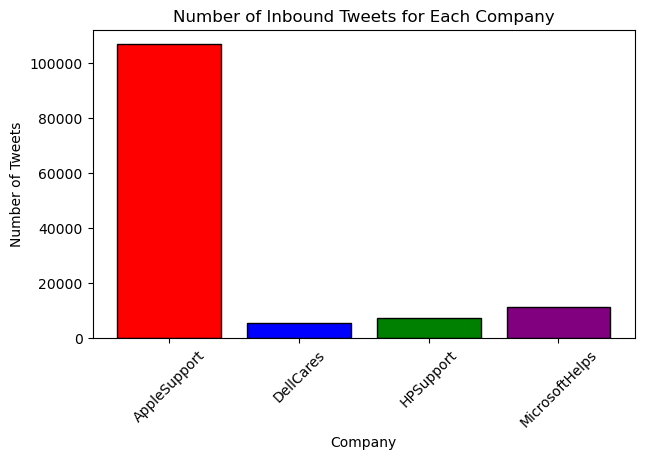

In [56]:
companies = grouped_data['author_id']
inbound_counts = grouped_data['count']
colors = ['red', 'blue', 'green', 'purple']
plt.figure(figsize=(7, 4))
plt.bar(companies, inbound_counts, color=colors, edgecolor='black')
plt.xlabel('Company')
plt.ylabel('Number of Tweets')
plt.title('Number of Inbound Tweets for Each Company')
plt.xticks(rotation=45) 
plt.show();

#### Now let's find the average response times for each company

In [57]:
filtered_data = data_set[data_set['author_id'].str.contains('MicrosoftHelps|AppleSupport|DellCares|HPSupport', case=False)]

In [58]:
# Convert 'created_at' and 'response_tweet_id' columns to datetime
filtered_data['created_at'] = pd.to_datetime(filtered_data['created_at'], errors='coerce').dt.tz_localize(None)
filtered_data['response_tweet_id'] = pd.to_datetime(filtered_data['response_tweet_id'], errors='coerce').dt.tz_localize(None)

In [59]:
# Filter out rows where 'response_tweet_id' or 'created_at' couldn't be parsed
cleaned_filtered_data = filtered_data.dropna(subset=['created_at', 'response_tweet_id'])

In [60]:
# Calculate response time in seconds 
cleaned_filtered_data['response_time'] = (cleaned_filtered_data['response_tweet_id'] - cleaned_filtered_data['created_at']).dt.total_seconds()

#### Results for average response times

In [61]:
average_response_time = cleaned_filtered_data.groupby('author_id')['response_time'].mean()
print(average_response_time)

author_id
AppleSupport      1.145536e+08
DellCares         1.839929e+07
HPSupport         7.365916e+08
MicrosoftHelps    3.703211e+08
Name: response_time, dtype: float64


#### What companies have the fastest and slowest response time?

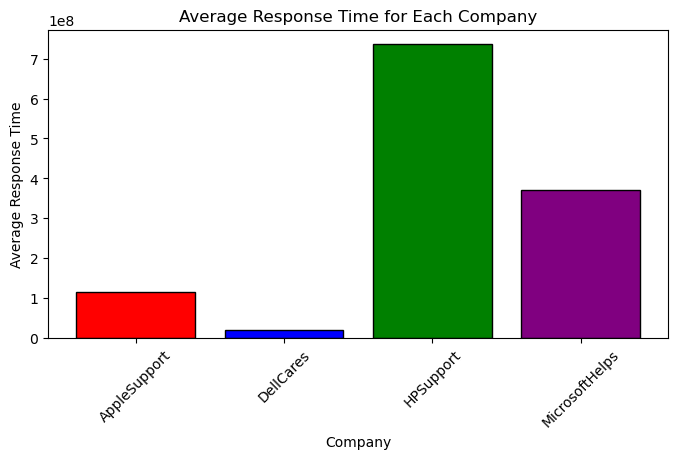

In [62]:
companies = average_response_time.index
response_times = average_response_time.values
plt.figure(figsize=(8, 4))
colors = ['red', 'blue', 'green', 'purple']
plt.bar(companies, response_times, color=colors, edgecolor='black')
plt.xlabel('Company')
plt.ylabel('Average Response Time')
plt.title('Average Response Time for Each Company')
plt.xticks(rotation=45)  
plt.show()

#### Let's calculate the final response times for each company based on the information found

#### AppleSupport

In [63]:
average_response_time_apple = 1.145536e+08  
inbound_tweet_count_apple = 106860 
final_response_time_apple = inbound_tweet_count_apple * average_response_time_apple
print(f"Final Response Time for AppleSupport: {final_response_time_apple} milliseconds")

Final Response Time for AppleSupport: 12241197696000.0 milliseconds


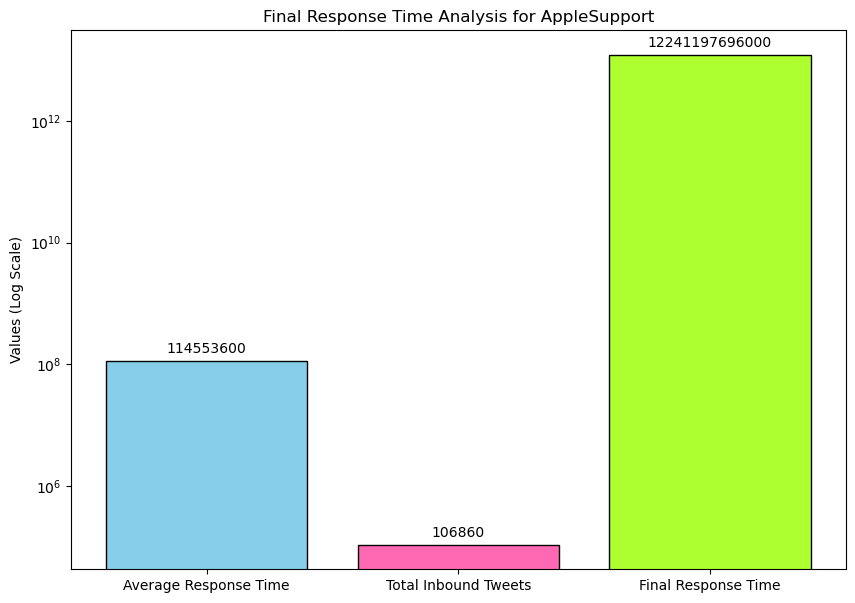

In [64]:
categories = ['Average Response Time', 'Total Inbound Tweets', 'Final Response Time']
values = [average_response_time_apple, inbound_tweet_count_apple, final_response_time_apple]

plt.figure(figsize=(10, 7))
plt.bar(categories, values, color=['skyblue', 'hotpink', 'greenyellow'],edgecolor='black')

for i, v in enumerate(values):
    plt.text(i, v + 0.2 * v, f"{v:.0f}", ha='center', va='bottom', fontsize=10)

plt.ylabel('Values (Log Scale)')
plt.yscale('log') 
plt.title('Final Response Time Analysis for AppleSupport')
plt.show()

#### DellCares

In [65]:
average_response_time_dell = 1.839929e+07
inbound_tweet_count_dell = 5336
final_response_time_dell = inbound_tweet_count_dell * average_response_time_dell
print(f"Final Response Time for Dellcares: {final_response_time_dell} milliseconds")

Final Response Time for Dellcares: 98178611440.0 milliseconds


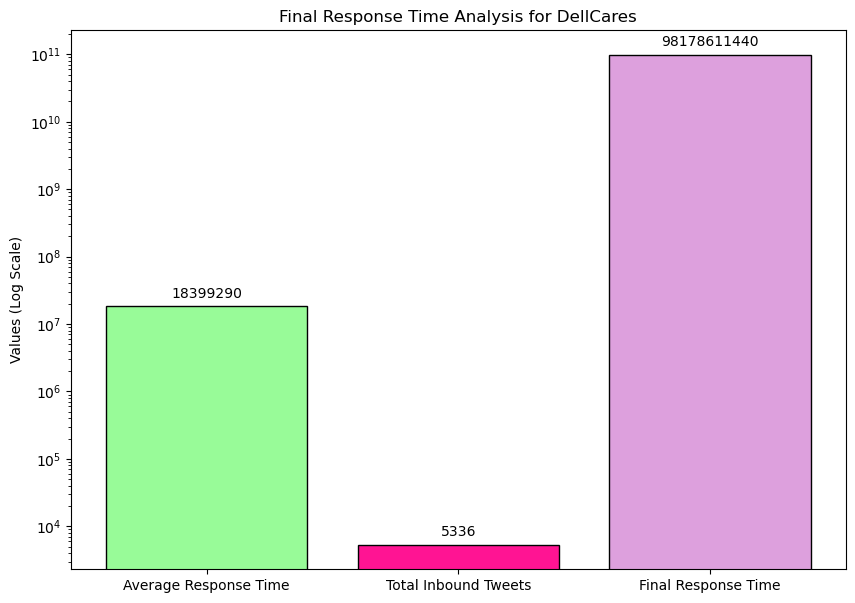

In [66]:
categories = ['Average Response Time', 'Total Inbound Tweets', 'Final Response Time']
values = [average_response_time_dell, inbound_tweet_count_dell, final_response_time_dell]

plt.figure(figsize=(10, 7))
plt.bar(categories, values, color=['palegreen', 'deeppink', 'plum'],edgecolor='black')

for i, v in enumerate(values):
    plt.text(i, v + 0.2 * v, f"{v:.0f}", ha='center', va='bottom', fontsize=10)

plt.ylabel('Values (Log Scale)')
plt.yscale('log') 
plt.title('Final Response Time Analysis for DellCares')
plt.show()

#### HPSupport

In [67]:
average_response_time_hp = 7.365916e+08
inbound_tweet_count_hp = 7200
final_response_time_hp = inbound_tweet_count_hp * average_response_time_hp
print(f"Final Response Time for HPSupport: {final_response_time_hp} milliseconds")

Final Response Time for HPSupport: 5303459520000.0 milliseconds


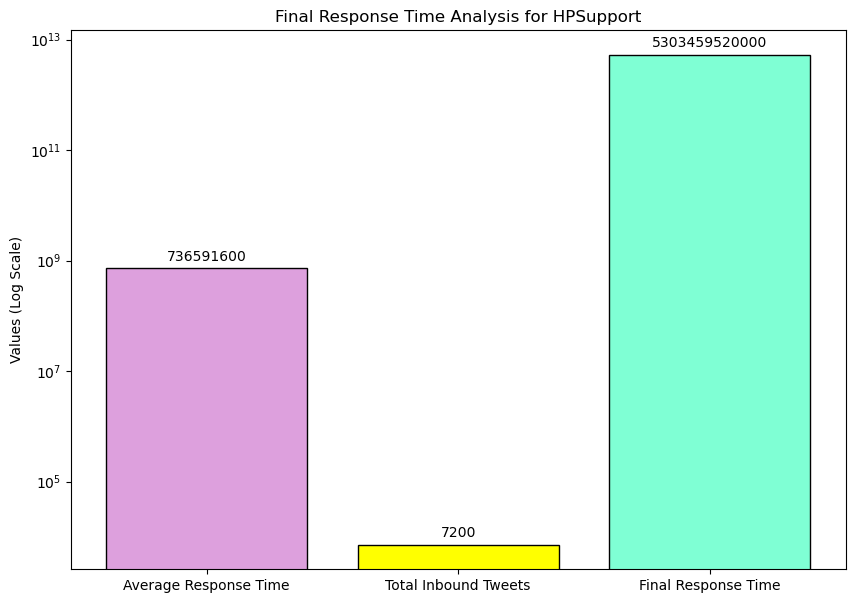

In [68]:
categories = ['Average Response Time', 'Total Inbound Tweets', 'Final Response Time']
values = [average_response_time_hp, inbound_tweet_count_hp, final_response_time_hp]

plt.figure(figsize=(10, 7))
plt.bar(categories, values, color=['plum', 'yellow', 'aquamarine'],edgecolor='black')

for i, v in enumerate(values):
    plt.text(i, v + 0.2 * v, f"{v:.0f}", ha='center', va='bottom', fontsize=10)

plt.ylabel('Values (Log Scale)')
plt.yscale('log') 
plt.title('Final Response Time Analysis for HPSupport')
plt.show()

In [69]:
average_response_time_microsoft = 3.703211e+08
inbound_tweet_count_microsoft = 11304
final_response_time_microsoft = inbound_tweet_count_microsoft * average_response_time_microsoft
print(f"Final Response Time for MicrosoftHelps: {final_response_time_microsoft} milliseconds")

Final Response Time for MicrosoftHelps: 4186109714400.0 milliseconds


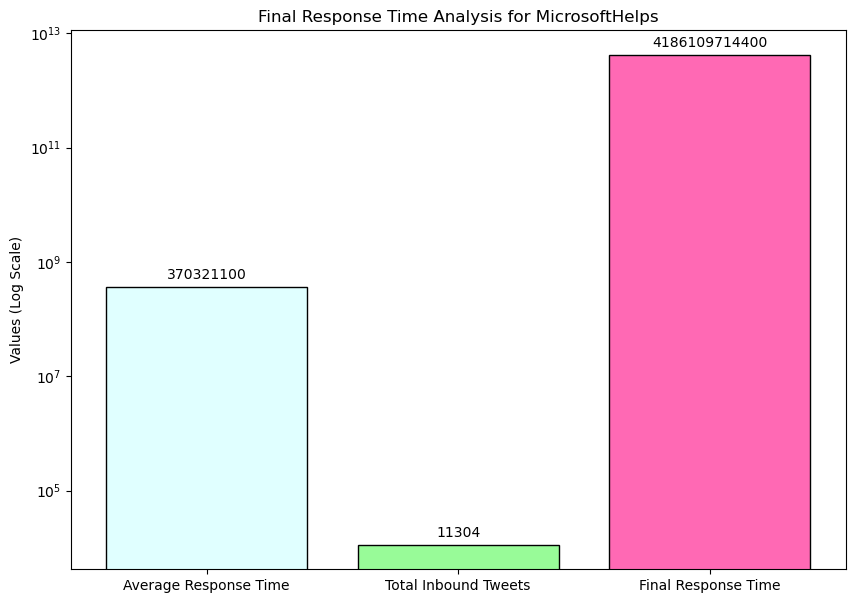

In [70]:
categories = ['Average Response Time', 'Total Inbound Tweets', 'Final Response Time']
values = [average_response_time_microsoft, inbound_tweet_count_microsoft, final_response_time_microsoft]

plt.figure(figsize=(10, 7))
plt.bar(categories, values, color=['lightcyan', 'palegreen', 'hotpink'],edgecolor='black')

for i, v in enumerate(values):
    plt.text(i, v + 0.2 * v, f"{v:.0f}", ha='center', va='bottom', fontsize=10)

plt.ylabel('Values (Log Scale)')
plt.yscale('log') 
plt.title('Final Response Time Analysis for MicrosoftHelps')
plt.show()

##### Final response times for all companies

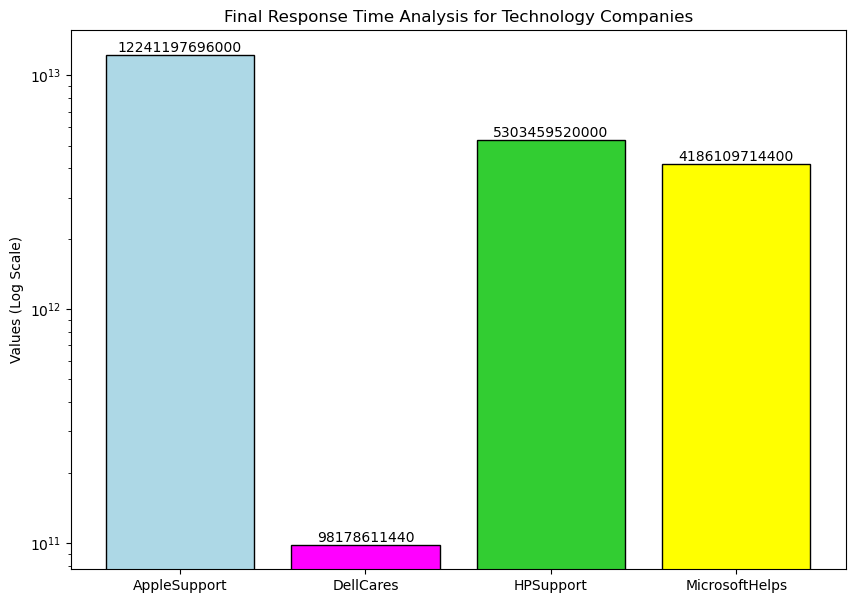

In [72]:
categories = ['AppleSupport', 'DellCares', 'HPSupport', 'MicrosoftHelps']
values = [final_response_time_apple, final_response_time_dell,final_response_time_hp, final_response_time_microsoft]

plt.figure(figsize=(10, 7))
plt.bar(categories, values, color=['lightblue', 'magenta', 'limegreen','yellow'],edgecolor='black')

for i, v in enumerate(values):
    plt.text(i, v + 0 * v, f"{v:.0f}", ha='center', va='bottom', fontsize=10)

plt.ylabel('Values (Log Scale)')
plt.yscale('log') 
plt.title('Final Response Time Analysis for Technology Companies')
plt.show()

### Results

'AppleSupport' has the highest average response time, while 'DellCares' has the lowest average response time.
Shorter response times are often associated with higher customer satisfaction. Customers tend to be more satisfied when their issues are addressed promptly.

## Customer Support Twitter Analysis for Airline Companies

##### Objective:
This notebook explores customer interactions in a Customer Support Twitter dataset. We focus on understanding the relationship between response times and customer satisfaction for Airline companies, American and Delta.

##### Approach:
Through meticulous analysis, we get into response times and customer sentiments in conversations. By examining these factors, we aim to uncover valuable patterns and trends, offering insights into effective customer support practices.

##### Key Question: 
How does response time correlate to customer satisfaction when comparing American Airlines & Delta?

##### Purpose impact:
This analysis aims to help the analyzed companies by providing actionable insights derived from customer interactions. By understanding customer sentiments and response dynamics, these technology support companies can optimize their communication strategies, fostering improved customer satisfaction and engagement.

In [74]:
# Load the Dataset
file_path = 'twcs.csv'
data_set = pd.read_csv('twcs.csv')
data_set.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16.0


In [75]:
data_set.shape

(2811774, 7)

#### Exploring and cleaning the data to obtain specific companies 

In [76]:
# Handle missing values
data_set['response_tweet_id'].fillna(-1, inplace=True)
data_set['in_response_to_tweet_id'].fillna(-1, inplace=True)

In [77]:
filtered_data = data_set[data_set['author_id'].str.contains('delta|american', case=False)]

In [78]:
filtered_data.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
315,609,Delta,False,Sat Aug 06 01:44:03 +0000 2016,"@115818 Glad to check. Pls, DM your confirmati...",610,611.0
484,790,Delta,False,Tue Oct 31 22:27:38 +0000 2017,@115882 I'm sorry. The earlier flight may not ...,791,792.0
486,793,Delta,False,Tue Oct 31 22:52:37 +0000 2017,@115882 My apologies. If that flight never sho...,-1,791.0
488,794,Delta,False,Tue Oct 31 22:25:31 +0000 2017,@115883 Please share additional details about ...,795,796.0
490,797,Delta,False,Tue Oct 31 23:07:41 +0000 2017,@115883 Please do. *AFC https://t.co/6iDGBJAc2m,798,795.0
493,799,Delta,False,Sun Oct 29 16:56:47 +0000 2017,"@115883 I sincerely apologize, our IT team is ...","800,796",801.0
495,802,Delta,False,Tue Oct 31 22:23:07 +0000 2017,"@115884 Oh, no! Please speak to a member of th...",-1,803.0
497,804,Delta,False,Tue Oct 31 22:22:01 +0000 2017,@115885 2/2 https://t.co/6iDGBJAc2m,"805,806",807.0
501,809,Delta,False,Tue Oct 31 19:21:13 +0000 2017,"@115885 Hello, Richard! Please DM your confirm...",807,810.0
504,813,Delta,False,Tue Oct 31 18:42:21 +0000 2017,"@115885 Hi, Richard. Can you pls DM your confi...",811,814.0


In [79]:
# Handle Missing Values
filtered_data = data_set[data_set['author_id'].str.contains('delta|american', case=False)]
filtered_data = data_set.dropna()
print(filtered_data.isnull().sum())

tweet_id                   0
author_id                  0
inbound                    0
created_at                 0
text                       0
response_tweet_id          0
in_response_to_tweet_id    0
dtype: int64


In [80]:
# Group the filtered data and count the number of tweets in each company
filtered_data = data_set[data_set['author_id'].str.contains('delta|american', case=False)]
grouped_data = filtered_data.groupby(['author_id', 'inbound']).size().reset_index(name='count')
grouped_data.head(10)

,author_id,inbound,count
0,AmericanAir,False,36764
1,Delta,False,42253


#### What company has the most and least amount of tweets?

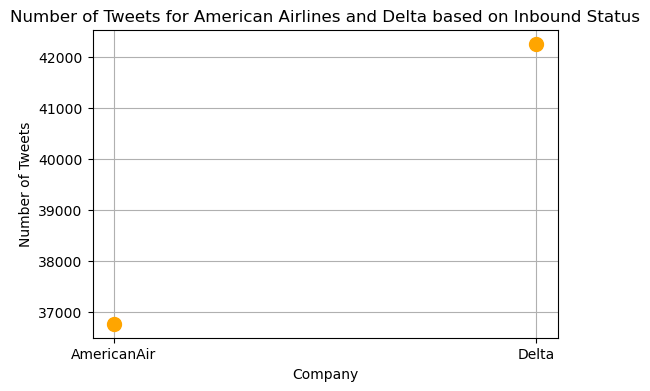

In [99]:
companies = ['AmericanAir', 'Delta']
counts = [36764, 42253]

plt.figure(figsize=(6, 4))

plt.plot(range(len(companies)), counts, marker='o', markersize=10, linestyle='', color='orange')

plt.xticks(range(len(companies)), companies)

plt.xlabel('Company')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets for American Airlines and Delta based on Inbound Status')
plt.grid(True)
plt.show()

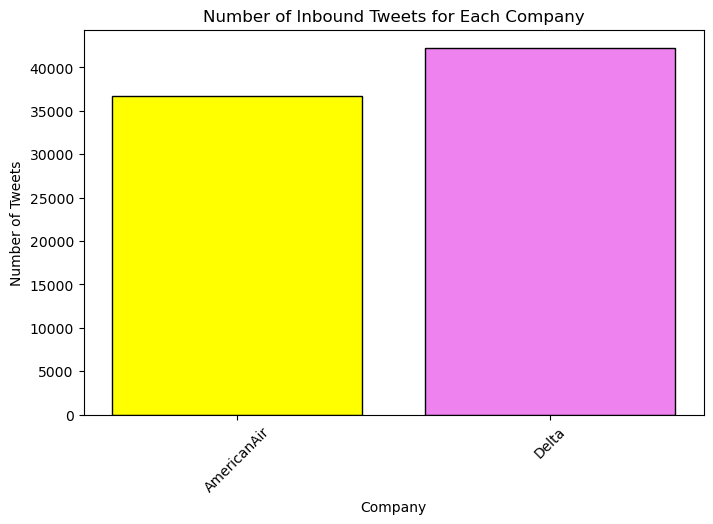

In [100]:
companies = grouped_data['author_id']
inbound_counts = grouped_data['count']
colors = ['yellow', 'violet']
plt.figure(figsize=(8, 5))
plt.bar(companies, inbound_counts, color=colors, edgecolor='black')
plt.xlabel('Company')
plt.ylabel('Number of Tweets')
plt.title('Number of Inbound Tweets for Each Company')
plt.xticks(rotation=45) 
plt.show();

In [101]:
# Convert 'response_tweet_id' and 'in_response_to_tweet_id' to numeric 
filtered_data['response_tweet_id'] = pd.to_numeric(filtered_data['response_tweet_id'], errors='coerce')
filtered_data['in_response_to_tweet_id'] = pd.to_numeric(filtered_data['in_response_to_tweet_id'], errors='coerce')
filtered_data.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
315,609,Delta,False,Sat Aug 06 01:44:03 +0000 2016,"@115818 Glad to check. Pls, DM your confirmati...",610.0,611.0
484,790,Delta,False,Tue Oct 31 22:27:38 +0000 2017,@115882 I'm sorry. The earlier flight may not ...,791.0,792.0
486,793,Delta,False,Tue Oct 31 22:52:37 +0000 2017,@115882 My apologies. If that flight never sho...,-1.0,791.0
488,794,Delta,False,Tue Oct 31 22:25:31 +0000 2017,@115883 Please share additional details about ...,795.0,796.0
490,797,Delta,False,Tue Oct 31 23:07:41 +0000 2017,@115883 Please do. *AFC https://t.co/6iDGBJAc2m,798.0,795.0
493,799,Delta,False,Sun Oct 29 16:56:47 +0000 2017,"@115883 I sincerely apologize, our IT team is ...",NaN,801.0
495,802,Delta,False,Tue Oct 31 22:23:07 +0000 2017,"@115884 Oh, no! Please speak to a member of th...",-1.0,803.0
497,804,Delta,False,Tue Oct 31 22:22:01 +0000 2017,@115885 2/2 https://t.co/6iDGBJAc2m,NaN,807.0
501,809,Delta,False,Tue Oct 31 19:21:13 +0000 2017,"@115885 Hello, Richard! Please DM your confirm...",807.0,810.0
504,813,Delta,False,Tue Oct 31 18:42:21 +0000 2017,"@115885 Hi, Richard. Can you pls DM your confi...",811.0,814.0


In [102]:
# Calculate response time in filtered data
filtered_data['response_time'] = filtered_data['response_tweet_id'] - filtered_data['in_response_to_tweet_id']

In [103]:
# Calculate average response time for each airline
average_response_time = filtered_data.groupby('author_id')['response_time'].mean()

#### Statistical Predicitions / Modeling

In [104]:
correlation = filtered_data.corr(numeric_only=True)

filtered_data['response_time'] = filtered_data['response_tweet_id'] - filtered_data['in_response_to_tweet_id']

average_response_time = filtered_data.groupby('author_id')['response_time'].mean()

print(average_response_time)

author_id
AmericanAir   -9.832385e+05
Delta         -1.069096e+06
Name: response_time, dtype: float64


##### Convert to positive numbers for better analysis

In [105]:
filtered_data['response_time'] = filtered_data['response_tweet_id'] - filtered_data['in_response_to_tweet_id']

average_response_time = filtered_data.groupby('author_id')['response_time'].mean().abs()

print(average_response_time)

author_id
AmericanAir    9.832385e+05
Delta          1.069096e+06
Name: response_time, dtype: float64


#### What company has the slowest and fastest response time?

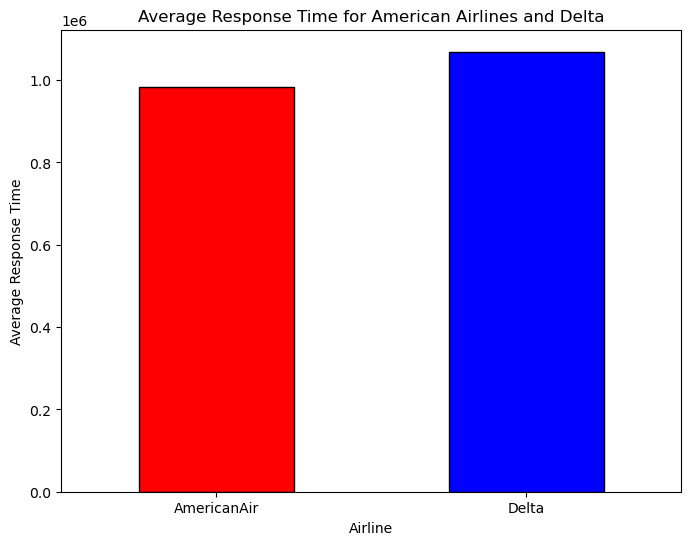

In [106]:
# Visualize the data
plt.figure(figsize=(8, 6))
colors = ['red', 'blue'] 
average_response_time.plot(kind='bar', color=colors, edgecolor='black') 
plt.title('Average Response Time for American Airlines and Delta')
plt.xlabel('Airline')
plt.ylabel('Average Response Time')
plt.xticks(range(len(average_response_time.index)), average_response_time.index, rotation=0)
plt.show()

#### Now let's compare the total inbound tweets and the repsonse time of both companies

#### American Airlines

In [107]:
average_response_time_american = 9.832385e+05
inbound_tweet_count_american = 36764 
final_response_time_american = inbound_tweet_count_american * average_response_time_american
print(f"Final Response Time for American Airline: {final_response_time_american} milliseconds")

Final Response Time for American Airline: 36147780214.0 milliseconds


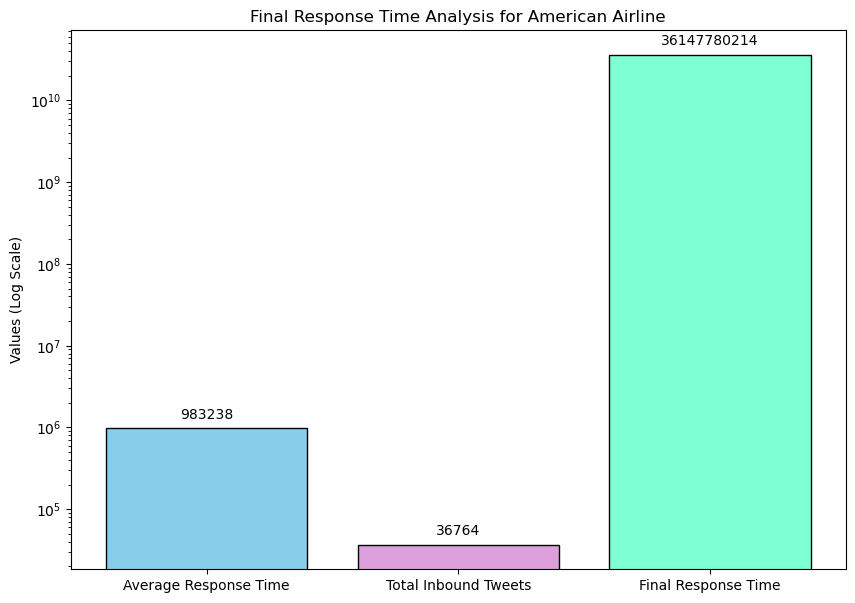

In [108]:
categories = ['Average Response Time', 'Total Inbound Tweets', 'Final Response Time']
values = [average_response_time_american, inbound_tweet_count_american, final_response_time_american]

plt.figure(figsize=(10, 7))
plt.bar(categories, values, color=['skyblue', 'plum', 'aquamarine'],edgecolor='black')

for i, v in enumerate(values):
    plt.text(i, v + 0.2 * v, f"{v:.0f}", ha='center', va='bottom', fontsize=10)

plt.ylabel('Values (Log Scale)')
plt.yscale('log') 
plt.title('Final Response Time Analysis for American Airline')
plt.show()


#### Delta Airlines

In [109]:
average_response_time_delta = 1.069096e+06
inbound_tweet_count_delta = 42253
final_response_time_delta = inbound_tweet_count_delta * average_response_time_delta
print(f"Final Response Time for Delta Airlines: {final_response_time_delta} milliseconds")

Final Response Time for Delta Airlines: 45172513288.0 milliseconds


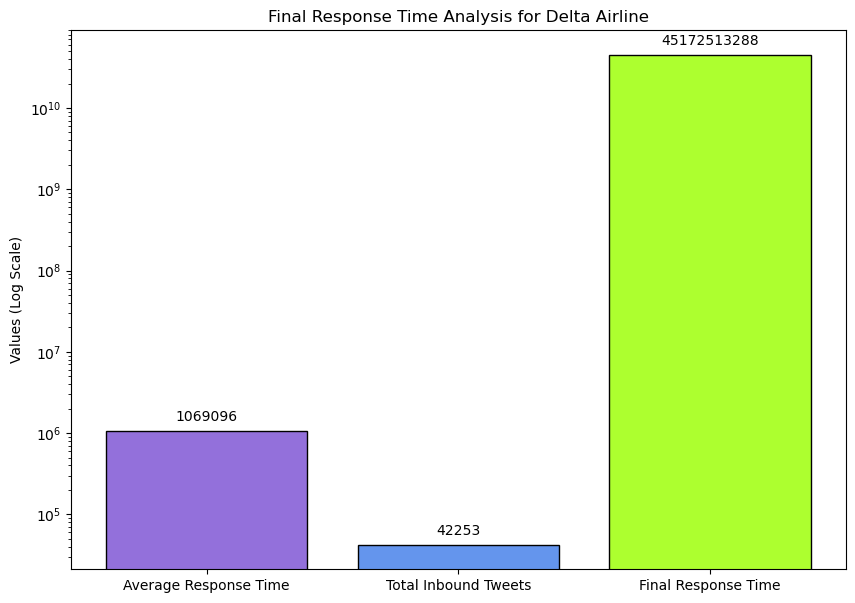

In [110]:
categories = ['Average Response Time', 'Total Inbound Tweets', 'Final Response Time']
values = [average_response_time_delta, inbound_tweet_count_delta, final_response_time_delta]

plt.figure(figsize=(10, 7))
plt.bar(categories, values, color=['mediumpurple', 'cornflowerblue', 'greenyellow'],edgecolor='black')

for i, v in enumerate(values):
    plt.text(i, v + 0.2 * v, f"{v:.0f}", ha='center', va='bottom', fontsize=10)

plt.ylabel('Values (Log Scale)')
plt.yscale('log') 
plt.title('Final Response Time Analysis for Delta Airline')
plt.show()


#### Comparing final response times of American Airline and Delta Airline

#### What company has a faster final response time?

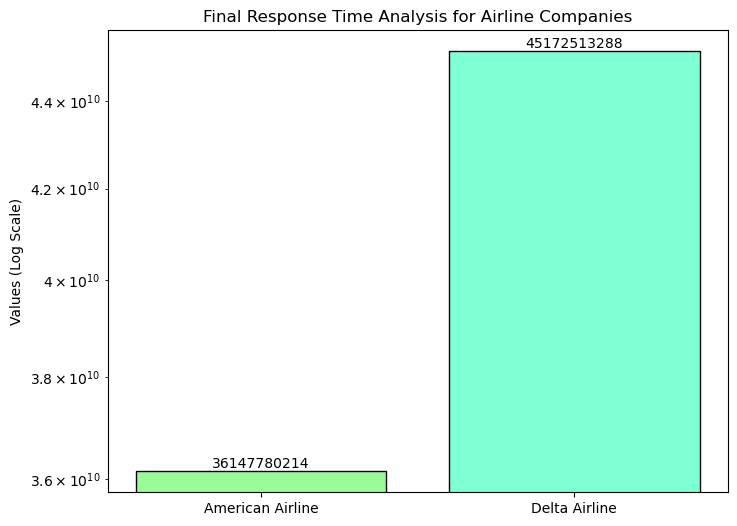

In [111]:
categories = ['American Airline', 'Delta Airline']
values = [final_response_time_american, final_response_time_delta]

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['palegreen','aquamarine'],edgecolor='black')

for i, v in enumerate(values):
    plt.text(i, v + 0 * v, f"{v:.0f}", ha='center', va='bottom', fontsize=10)

plt.ylabel('Values (Log Scale)')
plt.yscale('log') 
plt.title('Final Response Time Analysis for Airline Companies')
plt.show()

## Result
American Airlines with an average response time of approximately 36,147,780,214 units is faster than Delta with an average response time of approximately 45,172,513,288 units. This can correlate to customers being more satified with American Airlines customer support via the tweet data set.